In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


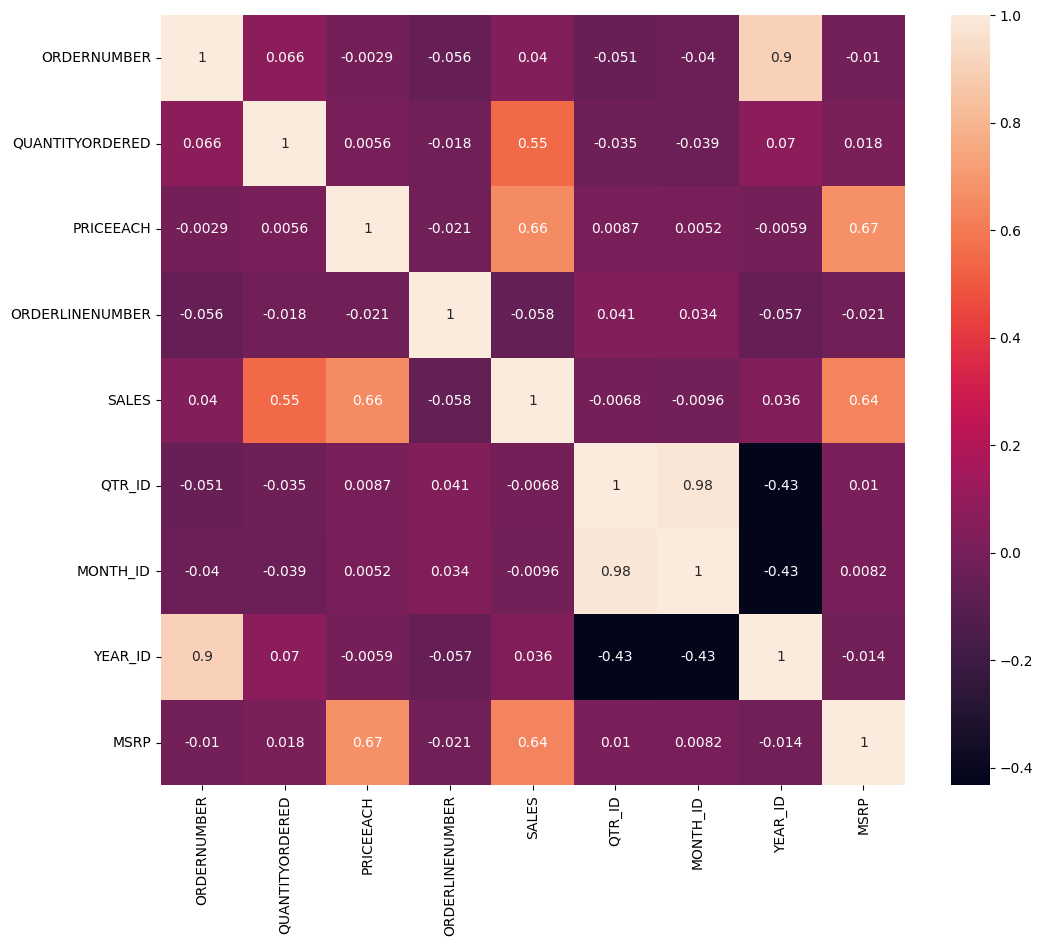

In [6]:
df_numeric = df.select_dtypes(include=['number'])

fig = plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [7]:
df=df[['PRICEEACH', 'MSRP']]
df.head()

,PRICEEACH,MSRP
0,95.70,95
1,81.35,95
2,94.74,95
3,83.26,95
4,100.00,95


In [8]:
df.isna().any()

PRICEEACH    False
MSRP         False
dtype: bool

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [10]:
df.describe()

,PRICEEACH,MSRP
count,2823.000000,2823.000000
mean,83.658544,100.715551
std,20.174277,40.187912
min,26.880000,33.000000
25%,68.860000,68.000000
50%,95.700000,99.000000
75%,100.000000,124.000000
max,100.000000,214.000000


In [11]:
df.shape

(2823, 2)

<Axes: >

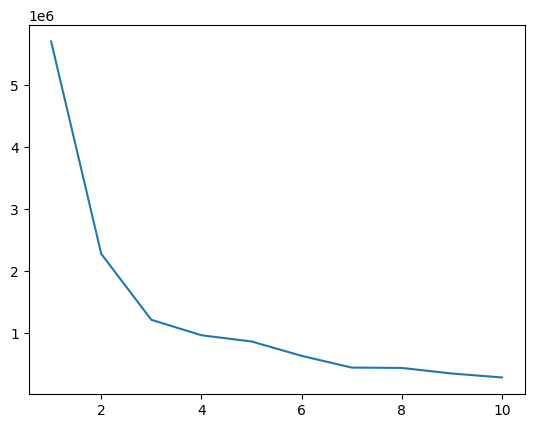

In [12]:
from sklearn.cluster import KMeans
inertia=[]

for i in range (1,11):
    clusters=KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters.fit(df)
    inertia.append(clusters.inertia_)

#plt.figure(figsize=(6,6))
sns.lineplot(x=[1,2,3,4,5,6,7,8,9,10], y=inertia)

In [13]:
kmeans= KMeans(n_clusters=3, random_state=42)
y_kmeans= kmeans.fit_predict(df)
y_kmeans

array([2, 2, 2, ..., 1, 1, 1])

In [14]:
print(len(df['PRICEEACH']), len(df['MSRP']), len(y_kmeans))

2823 2823 2823


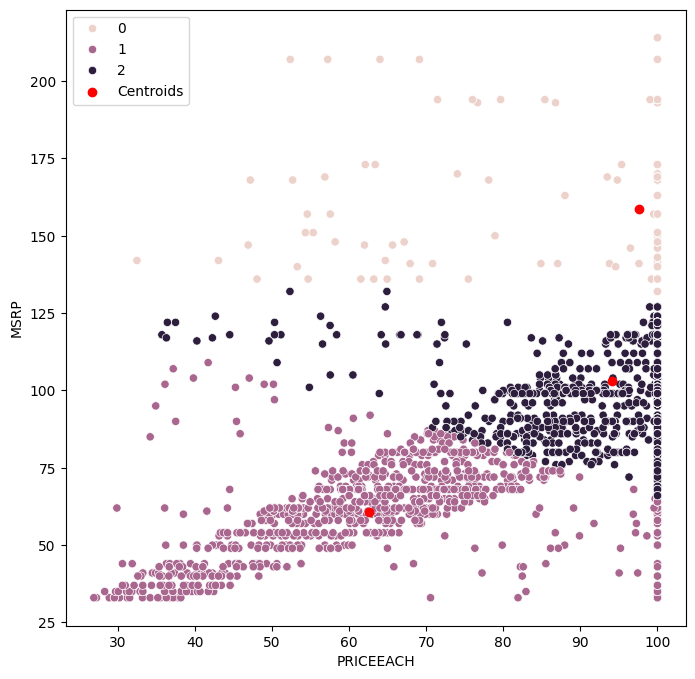

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['PRICEEACH'], y=df['MSRP'], hue=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c= 'red', label='Centroids')
plt.legend()
plt.show()

In [16]:
kmeans.cluster_centers_

array([[ 97.59890263, 158.7202473 ],
       [ 62.62543651,  60.81646825],
       [ 94.08830479, 103.01797945]])